In [51]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
import sidetable

In [2]:
data = pd.read_csv('data/tips.csv')

In [3]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
data.shape

(244, 7)

In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [23]:
data['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [24]:
data['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [25]:
data['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [26]:
data['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [19]:
px.scatter(data,x='total_bill',y='tip',template='plotly_white',color='sex',trendline='ols')

In [37]:
px.scatter(data,x='total_bill',y='tip',template='plotly_white',color='time',trendline='ols')

In [35]:
px.scatter(data,x='total_bill',y='tip',template='plotly_white',color='smoker',trendline='ols')

In [40]:
px.scatter(data,x='total_bill',y='tip',template='plotly_white',color='day',trendline='ols')

In [50]:
px.scatter(data,x='size',y='tip',template='plotly_white')

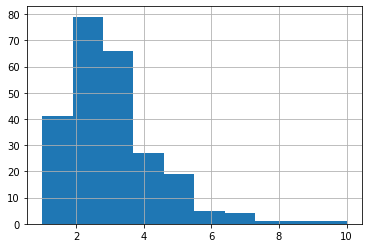

In [17]:
data['tip'].hist()

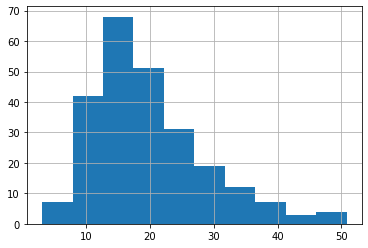

In [18]:
data['total_bill'].hist()

In [30]:
data['tip-percent']=data['tip']*100/data['total_bill']

In [31]:
data

,total_bill,tip,sex,smoker,day,time,size,bill-tip-ratio,tip-percent
0,16.99,1.01,Female,No,Sun,Dinner,2,16.821782,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,6.228916,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,6.002857,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,7.154079,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,6.811634,14.680765
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,4.903716,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590000,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335000,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,10.182857,9.820426


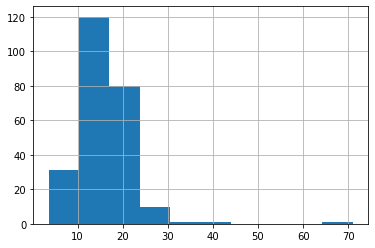

In [32]:
data['tip-percent'].hist()

In [34]:
px.scatter(data,x='total_bill',y='tip-percent',template='plotly_white',color='sex')

In [43]:
px.box(data,x='day',y='tip-percent',category_orders={'day':['Thur','Fri','Sat','Sun']},template='plotly_white')

In [213]:
px.imshow(df.corr())

### Remove outliers, those with tip percent >= 30%

In [45]:
data_cleaned = data[data['tip-percent']<30].reset_index(drop=True)

In [46]:
data_cleaned

,total_bill,tip,sex,smoker,day,time,size,bill-tip-ratio,tip-percent
0,16.99,1.01,Female,No,Sun,Dinner,2,16.821782,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,6.228916,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,6.002857,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,7.154079,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,6.811634,14.680765
...,...,...,...,...,...,...,...,...,...
236,29.03,5.92,Male,No,Sat,Dinner,3,4.903716,20.392697
237,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590000,7.358352
238,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335000,8.822232
239,17.82,1.75,Male,No,Sat,Dinner,2,10.182857,9.820426


In [271]:
X = data_cleaned[['total_bill','tip','sex','smoker','day','time','size']]

In [272]:
X = pd.concat([X, pd.get_dummies(X["sex"],prefix="sex")], axis=1)
X = pd.concat([X, pd.get_dummies(X["day"],prefix="day")], axis=1)
X = pd.concat([X, pd.get_dummies(X["time"],prefix="time")], axis=1)
X = pd.concat([X, pd.get_dummies(X["smoker"],prefix="smoker")], axis=1)
X.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,smoker_No,smoker_Yes
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,0,0,1,0,1,0,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,0,0,1,0,1,0,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,0,0,1,0,1,0,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,0,0,1,0,1,0,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,0,0,1,0,1,0,1,0


In [273]:
columns_to_scale = ['tip', 'size', 'total_bill']

In [274]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_columns = pd.DataFrame(scaler.fit_transform(X[columns_to_scale]),columns=columns_to_scale)
scaled_columns.describe()

,tip,size,total_bill
count,241.000000,241.000000,241.000000
mean,0.221498,0.316183,0.315126
std,0.153086,0.190032,0.195956
min,0.000000,0.000000,0.000000
25%,0.111111,0.200000,0.170217
50%,0.208889,0.200000,0.267865
75%,0.278889,0.400000,0.411008
max,1.000000,1.000000,1.000000


In [275]:
X.drop(["total_bill", "tip", "size", "smoker", "sex","day", "time"], axis = 1, inplace = True)
X = pd.concat([X, scaled_columns], axis = 1)

In [276]:
X.head()

,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,smoker_No,smoker_Yes,tip,size,total_bill
0,1,0,0,0,1,0,1,0,1,0,0.001111,0.2,0.249445
1,0,1,0,0,1,0,1,0,1,0,0.073333,0.4,0.101864
2,0,1,0,0,1,0,1,0,1,0,0.277778,0.4,0.338660
3,0,1,0,0,1,0,1,0,1,0,0.256667,0.2,0.397914
4,1,0,0,0,1,0,1,0,1,0,0.290000,0.6,0.418109


In [277]:
X.drop(["sex_Female","time_Dinner", "smoker_No"], axis=1, inplace=True)

In [278]:
df = X

In [279]:
#df = df[['tip','size','total_bill']]

In [280]:
Y = df.tip
X = df.loc[:,df.columns!="tip"]

In [281]:
Y

0      0.001111
1      0.073333
2      0.277778
3      0.256667
4      0.290000
         ...   
236    0.546667
237    0.111111
238    0.111111
239    0.083333
240    0.222222
Name: tip, Length: 241, dtype: float64

In [291]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

In [292]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=3)

In [293]:
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [294]:
regressor.score(X_train,y_train)

0.672585463752335

In [295]:
y_pred = regressor.predict(X_test)

In [296]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.30566111376589356


In [297]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

0.014563155006858713


In [298]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

0.09871111111111111


In [299]:
px.scatter(x=y_pred,y=y_test)

In [300]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10)

In [301]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [302]:
regressor.score(X_train,y_train)

0.9043844199611519

In [303]:
y_pred = regressor.predict(X_test)

In [304]:
print(r2_score(y_test, y_pred))

0.35056691586880373


In [305]:
print(mean_squared_error(y_test, y_pred))

0.013621294814814812


In [306]:
print(mean_absolute_error(y_test, y_pred))

0.09449777777777778


In [307]:
px.scatter(x=y_pred,y=y_test)